<a href="https://colab.research.google.com/github/niyatighagada/TSF-DSBA-TASKS/blob/main/ResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["Normal","Abnormal"]

In [3]:
dataset = pd.read_csv("ATP Dataset_2012-01 to 2017-07_Int_V4.csv")
dataset.head()

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Class
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,1
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,1
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0


In [21]:
#check for any  nullvalues 
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal event
#1 is for abnormal event
print('-------')
print("Break down of the Normal and Abnormal Events")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  True
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Abnormal Events
0    12773
1     1962
Name: Class, dtype: int64


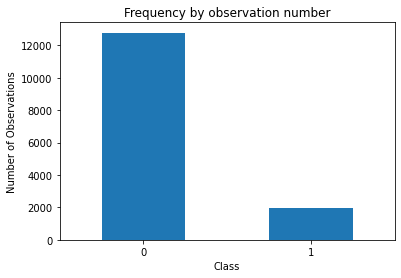

In [22]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

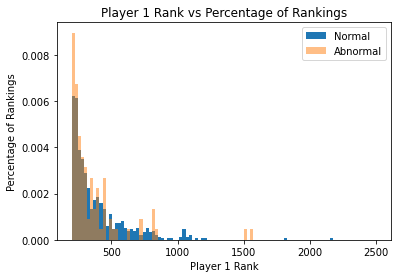

In [23]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
abnormal_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Player1_Rank, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(abnormal_dataset.Player1_Rank, bins=bins, alpha=0.5, density=True, label='Abnormal')
plt.legend(loc='upper right')
plt.title("Player 1 Rank vs Percentage of Rankings")
plt.xlabel("Player 1 Rank")
plt.ylabel("Percentage of Rankings");
plt.show()

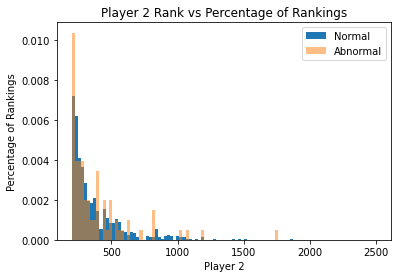

In [24]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
abnormal_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Player2_Rank, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(abnormal_dataset.Player2_Rank, bins=bins, alpha=0.5, density=True, label='Abnormal')
plt.legend(loc='upper right')
plt.title("Player 2 Rank vs Percentage of Rankings")
plt.xlabel("Player 2")
plt.ylabel("Percentage of Rankings");
plt.show()

In [25]:
dataset.head()

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Class
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,1
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,1
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0


In [26]:
lisCol = ["ATP","Tournament","Series","Court","Surface","Player1","Player2","Winner","Round"]
df2=dataset.drop(lisCol, axis = 1)
print(df2)

       Tournament_Int   Date  Series_Int  Court_Int  Surface_Int  Round_Int  \
0              1.2757  42737      2.9693     3.6494       4.4983     5.1257   
1              1.2757  42737      2.9693     3.6494       4.4983     5.1257   
2              1.2757  42737      2.9693     3.6494       4.4983     5.1257   
3              1.2757  42737      2.9693     3.6494       4.4983     5.1257   
4              1.2757  42737      2.9693     3.6494       4.4983     5.1257   
...               ...    ...         ...        ...          ...        ...   
14730          1.7532  41223      2.7079     3.2579       4.4983     5.9542   
14731          1.7532  41223      2.7079     3.2579       4.4983     5.9542   
14732          1.7532  41224      2.7079     3.2579       4.4983     5.2101   
14733          1.7532  41224      2.7079     3.2579       4.4983     5.2101   
14734          1.7532  41225      2.7079     3.2579       4.4983     5.3011   

       Best_of  Winner_Int  Player1_Int  Player2_In

In [27]:
sc=StandardScaler()
df2['Player1_Rank'] = sc.fit_transform(df2['Player1_Rank'].values.reshape(-1, 1))
df2['Player2_Rank'] = sc.fit_transform(df2['Player2_Rank'].values.reshape(-1, 1))

In [28]:
raw_data = dataset.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)

In [29]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#creating normal and abnormal datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
abnormal_train_data = train_data[train_labels]
abnormal_test_data = test_data[test_labels]
print(" No. of records in Abnormal Train Data=",len(abnormal_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Abnormal Test Data=",len(abnormal_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Abnormal Train Data= 1595
 No. of records in Normal Train data= 10193
 No. of records in Abnormal Test Data= 367
 No. of records in Normal Test data= 2580


In [30]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [31]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_14 (Dense)            (None, 14)                364       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0         
                                                                 
 dense_15 (Dense)            (None, 7)                 105       
                                                                 
 dense_16 (Dense)            (None, 4)                 32        
                                                                 
 dense_17 (Dense)            (None, 7)                 35        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0   

In [33]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_abnormal.h5",
mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

In [34]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [35]:
t = tf.expand_dims(tf.linspace(0., 2*3.14, 1000), -1)
noise = tf.random.normal((1000, 2), stddev=0.05)
points = tf.concat([tf.cos(t), tf.sin(t)], axis=1) + noise

In [36]:
shuffled_points = tf.random.shuffle(points)

encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1) # one-dimensional output
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(2) # decode to two dimensions again
])

autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss="mse")

autoencoder.fit(
    x=shuffled_points, # goal is that output is 
    y=shuffled_points, # close to the same input
    validation_split=0.2, # to check if the model is generalizing
    epochs=500
)

Epoch 1/500
25/25 [==============================] - 1s 14ms/step - loss: 0.4144 - val_loss: 0.3127
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2740 - val_loss: 0.2509
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2507 - val_loss: 0.2450
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2414 - val_loss: 0.2343
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2261 - val_loss: 0.2155
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2046 - val_loss: 0.1916
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1786 - val_loss: 0.1691
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1540 - val_loss: 0.1522
Epoch 9/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1298 - val_loss: 0.1296
Epoch 10/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1152 - val_loss: 0.1138
Epoch 11